In [ ]:
# Install for spliting folder
!pip install split-folders
!pip install split-folders tqdm

***Import Library that Required***

In [ ]:
import os
import shutil
import splitfolders

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)  # cek versi tensorflow

2.5.0


In [ ]:
import zipfile,os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline



---



***DATASET***

---


**Download the dataset that required**


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-01 10:03:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.3’

rockpaperscissors.z 100%[===================>] 307.92M  6.50MB/s    in 60s     

2021-07-01 10:04:19 (5.13 MB/s) - ‘rockpaperscissors.zip.3’ saved [322873683/322873683]



**File extraction**

In [ ]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


**Split dataset into train and validation**

Split the dataset into 60% training and 40% validation

In [ ]:
splitfolders.ratio('/content/rockpaperscissors/rps-cv-images', output="/content/rockpaperscissors/output_result", ratio=(.6, .4))

Copying files: 2188 files [00:01, 1428.93 files/s]


**Dataset diractory**

In [ ]:
base_dir = '/content/rockpaperscissors/output_result'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

Class : rock

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(validation_dir, 'rock')

Class : paper

In [ ]:
paper_dir = os.path.join(base_dir, 'paper')
train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(validation_dir, 'paper')

Class : scissors

In [ ]:
scissors_dir = os.path.join(base_dir, 'scissors')
train_scissors = os.path.join(train_dir, 'scissors')
val_scissors = os.path.join(validation_dir, 'scissors')

**Checking the class kategories in training and validation dataset**

In [ ]:
os.listdir('/content/rockpaperscissors/output_result/train')

['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/content/rockpaperscissors/output_result/val')

['paper', 'scissors', 'rock']

**Make the training data diractory for each class**

In [ ]:
train_clean_dir = os.path.join(train_dir, 'rock')
train_clean_dir = os.path.join(train_dir, 'paper')
train_clean_dir = os.path.join(train_dir, 'scissors')

**Make the validation data diractory for each class**

In [ ]:
validation_clean_dir = os.path.join(validation_dir, 'rock')
validation_clean_dir = os.path.join(validation_dir, 'paper')
validation_clean_dir = os.path.join(validation_dir, 'scissors')



---



***IMAGES AUGMENTATION***




In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

***IMAGES GENERATOR***

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical') # karena terdiri dari 3 kelas
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.




---



***MODEL SEQUENTIALS***

---



**CNN Architecture**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 128)     

**Compile model**

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

*Stop training when accuracy > 96%*

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96): 
      print("\nWe have reached %2.2f%% accuracy, so we will stop training." %(0.96*100))
      self.model.stop_training = True

callbacks = Callback()



---



***TRAINING MODEL***



In [ ]:
training = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=40, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2,
      callbacks=[callbacks])


Epoch 1/40
25/25 - 8s - loss: 1.1510 - accuracy: 0.4000 - val_loss: 1.1147 - val_accuracy: 0.4000
Epoch 2/40
25/25 - 6s - loss: 1.0984 - accuracy: 0.4000 - val_loss: 1.1404 - val_accuracy: 0.1000
Epoch 3/40
25/25 - 6s - loss: 1.0961 - accuracy: 0.3900 - val_loss: 1.0410 - val_accuracy: 0.4500
Epoch 4/40
25/25 - 6s - loss: 1.0585 - accuracy: 0.4100 - val_loss: 1.0236 - val_accuracy: 0.5500
Epoch 5/40
25/25 - 6s - loss: 0.8606 - accuracy: 0.6000 - val_loss: 0.3482 - val_accuracy: 0.8500
Epoch 6/40
25/25 - 6s - loss: 0.6976 - accuracy: 0.6900 - val_loss: 0.3860 - val_accuracy: 0.9000
Epoch 7/40
25/25 - 6s - loss: 0.4713 - accuracy: 0.8300 - val_loss: 0.2204 - val_accuracy: 0.9500
Epoch 8/40
25/25 - 6s - loss: 0.4313 - accuracy: 0.8400 - val_loss: 0.4294 - val_accuracy: 0.7500
Epoch 9/40
25/25 - 6s - loss: 0.3221 - accuracy: 0.9300 - val_loss: 0.3304 - val_accuracy: 0.9500
Epoch 10/40
25/25 - 6s - loss: 0.3444 - accuracy: 0.8800 - val_loss: 0.7661 - val_accuracy: 0.7000
Epoch 11/40
25/25 -



---



***ACCURACY PLOT***

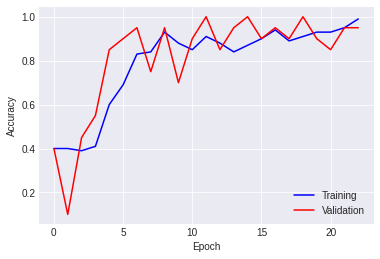

In [ ]:
 # Create a color palette
palette = plt.get_cmap('Set1')

plt.plot(range(len(training.history['accuracy'])),training.history['accuracy'], label='Training', color='blue')
plt.plot(range(len(training.history['val_accuracy'])),training.history['val_accuracy'], label='Validation', color='red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()



---



***IMAGE PREDICTION***

Saving 2PAcPusQ59xIMfiw.png to 2PAcPusQ59xIMfiw.png
2PAcPusQ59xIMfiw.png
That is a paper!


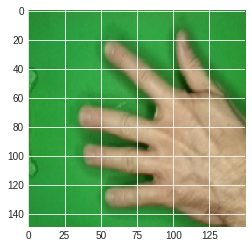

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  
  print(fn)
  if classes[0][0] == 1:
    print('That is a paper!')
  elif classes[0][1] == 1:
    print('That is a scissors!')
  else:
    print('That is a rock!')